# Step 1 : Setup and Load data

### Installing Dependencies

In [2]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf

In [4]:
# pip list

In [5]:
# gpus= tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
# tf.config.experimental.list_physical_devices('GPU')

In [7]:
#len(gpus)

### Remove dodgy images

In [8]:
import os

In [9]:
os.listdir('photus')

['cats', 'Dogs']

In [10]:
img_exts=['png','jpeg','jpg']

In [11]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [84]:
img= cv2.imread(os.path.join('photus','Dogs','62894302_101.jpg'))

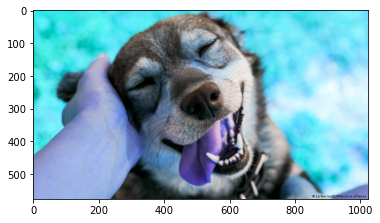

In [85]:
plt.imshow(img)

In [14]:
for img_class in os.listdir('photus'):
    for img in os.listdir(os.path.join('photus',img_class)):
        img_path= os.path.join('photus', img_class, img)
        try:
            img= cv2.imread(img_path)
            tip= imghdr.what(img_path)
            if tip not in img_exts:
                print('Removing all the elements of different image types')
                os.remove(img_path)
                
        except exception as e:
            print('issue with image')
            

# Step 2:  Load data

In [15]:
data= tf.keras.utils.image_dataset_from_directory('photus')

Found 372 files belonging to 2 classes.


In [16]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [17]:
data_iterator= data.as_numpy_iterator()

In [18]:
data_iterator

In [19]:
batch= data_iterator.next()

In [20]:
# batch
# batch[0]
len(batch[0])

32

In [21]:
 len(batch)

2

In [22]:
# Images representd as numpy array
batch[0].shape

(32, 256, 256, 3)

In [23]:
batch[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

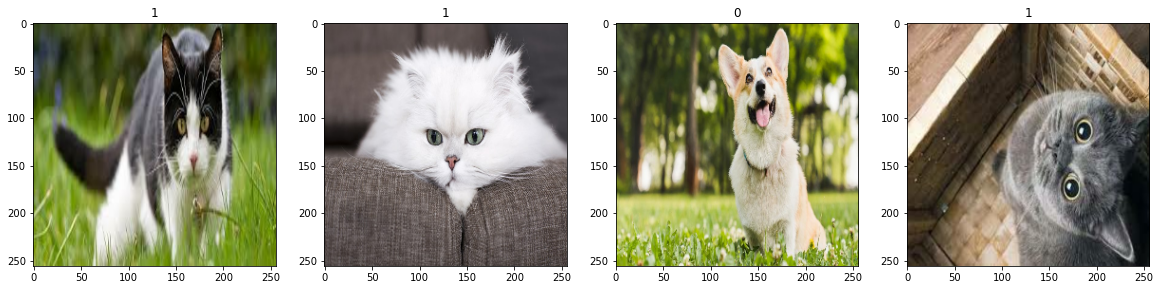

In [24]:
# To see which class belongs to 0 or 1
fig,ax= plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocessing Data 

In [25]:
data = data.map(lambda x,y:(x/255,y))

In [26]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
data.as_numpy_iterator().next()[0].min()

0.0

## Split Data

In [28]:
len(data)

12

In [29]:
train_size= int(len(data)*0.7)
valid_size= int(len(data)*0.2)
test_size= int(len(data)*0.1)+1

In [30]:
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
# data = np.asarray(data).astype(np.float32)
# tensorflow.convert_to_tensor(data)

In [32]:
import sklearn

In [33]:
# train = data.take(train_size)
# val = data.skip(train_size).take(valid_size)
# test = data.skip(train_size + valid_size).take(test_size)
# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest= train_test_split(batch[0],batch[1], train_size=0.7 )
train= data.take(int(len(data)*0.7))
val= data.take(int(len(data)*0.2))
test = data.take(int(len(data)*0.1))

In [36]:
train_size

8

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [39]:
data = np.expand_dims(data, axis=0)

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3),1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3),1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [43]:
# MaxPooling2D??

In [44]:
import tensorflow

In [45]:
model.compile('adam', loss= tensorflow.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train Data

In [47]:
logdir='logs'

In [48]:
tensorflow_callback= tensorflow.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
model.fit(train, epochs=20, callbacks=[tensorflow_callback])

Epoch 1/20
8/8 [==============================] - 9s 808ms/step - loss: 0.8300 - accuracy: 0.5391
Epoch 2/20
8/8 [==============================] - 7s 770ms/step - loss: 0.6630 - accuracy: 0.6367
Epoch 3/20
8/8 [==============================] - 7s 805ms/step - loss: 0.5935 - accuracy: 0.7461
Epoch 4/20
8/8 [==============================] - 8s 860ms/step - loss: 0.5497 - accuracy: 0.7148
Epoch 5/20
8/8 [==============================] - 7s 758ms/step - loss: 0.5097 - accuracy: 0.7695
Epoch 6/20
8/8 [==============================] - 7s 812ms/step - loss: 0.4090 - accuracy: 0.8359
Epoch 7/20
8/8 [==============================] - 8s 873ms/step - loss: 0.3677 - accuracy: 0.8438
Epoch 8/20
8/8 [==============================] - 8s 851ms/step - loss: 0.3130 - accuracy: 0.8672
Epoch 9/20
8/8 [==============================] - 8s 846ms/step - loss: 0.2436 - accuracy: 0.9062
Epoch 10/20
8/8 [==============================] - 7s 798ms/step - loss: 0.1383 - accuracy: 0.9609
Epoch 11/20
8/8 [==

## Evaluate Performance

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
bacc = BinaryAccuracy()

In [70]:
len(test)

1

In [71]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat= model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    bacc.update_state(y,yhat)

1/1 [==============================] - 0s 288ms/step


In [77]:
print(f'precision {pre.result().numpy()} recall {re.result().numpy()} BinaryAccuracy {bacc.result().numpy()}')

precision 1.0 recall 1.0 BinaryAccuracy 1.0


In [78]:
yhat

array([[9.9933404e-01],
       [9.9070191e-01],
       [1.3698834e-08],
       [3.8829257e-05],
       [9.7685957e-01],
       [9.4224685e-01],
       [9.7802871e-01],
       [9.9895632e-01],
       [9.7951782e-01],
       [1.1190068e-03],
       [9.5615667e-01],
       [9.7806770e-01],
       [9.0569514e-01],
       [2.5167415e-04],
       [9.5479172e-01],
       [9.9988514e-01],
       [9.9928182e-01],
       [9.9844635e-01],
       [1.9207666e-02],
       [9.7763866e-01],
       [9.7428793e-01],
       [9.1605181e-01],
       [9.4061106e-01],
       [9.9928409e-01],
       [9.9641508e-01],
       [8.6854070e-01],
       [3.4279437e-05],
       [2.2428889e-04],
       [9.9664837e-01],
       [9.4795805e-01],
       [9.4517446e-01],
       [9.9815941e-01]], dtype=float32)

## Test

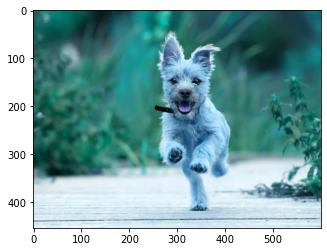

In [109]:
testing = cv2.imread('qw.jpg')
plt.imshow(testing)
plt.show()

In [110]:
resize= tf.image.resize(testing, (256,256))

In [111]:
yhat= model.predict(np.expand_dims((resize/255),0))

1/1 [==============================] - 0s 53ms/step


In [112]:
yhat

array([[0.217047]], dtype=float32)

In [115]:
if yhat > 0.5:
    print('Cat')
else:
    print('Dog')

Dog


## Save Model

In [116]:
model.save(os.path.join('model', 'dogcatclassifier.h5'))